In [1]:
import numpy as np
import json
import argparse
from torch.utils.data import DataLoader
from datasets.dl import GeMData
import torch
import os
from matplotlib import pyplot as plt
import collections
from datasets.config import GeMConfig
from modules.gem import GeM
import pandas as pd
import matplotlib.gridspec as gridspec

/root/miniconda3/envs/myconda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class cf:
    def __init__(self):
        self.dpath = "cifar100"
        self.arch = "swin"
        self.isM = 1
        self.img_matrix = "train_image_set.npy"
        self.para = "cifar100/para/swin.weighted_sum.fixweight"
args = cf()

In [36]:
class Visualization:
    
    def __init__(self, args):
        dbp = os.path.join(args.dpath, args.img_matrix)
        self.tim = torch.ByteTensor(np.load(dbp))
        
        model_info = GeMConfig(args.dpath)
        model_info.set_arch(args.arch)
        model_info.isM = args.isM
        self.model = GeM(model_info)
        
        pretrained_model = torch.load(args.para, map_location='cpu')
        print('load trained parameters', self.model.load_state_dict(pretrained_model, strict=False))
    
    def visualization(self, index):
        
        img = self.tim[index].numpy()
        img = img.transpose(1, 2, 0)
        plt.figure(figsize=(2, 2))
        plt.imshow(img)
        plt.show()
        
        model_input = self.tim[index].unsqueeze(0)
        with torch.no_grad():
            feature_maps = self.model.predict_all(model_input / 255.0, 224)
        for fm in feature_maps:
            self.show_feature_map(fm)
    
    def show_feature_map(self, feature_tensor):
        feature_np = feature_tensor.squeeze().numpy()
        print('total image shape', feature_np.shape)
        f, axarr = plt.subplots(3, 14, figsize=(20, 4))
        for i in range(3):
            for j in range(14):
                cur_idx = i * 14 + j
                new_fm = self.make_gray(feature_np[cur_idx])
                axarr[i][j].imshow(new_fm, cmap='gray', vmin=0, vmax=255)
                axarr[i][j].axis('off')
        plt.show()
#     def show_feature_map(self, feature_tensor):
#         feature_np = feature_tensor.squeeze().numpy()
#         print('total image shape', feature_np.shape)

#         plt.figure(figsize=(20, 20))
#         gs1 = gridspec.GridSpec(3, 17)
#         gs1.update(wspace=0.03, hspace=0.01)
#         for i in range(3 * 17):
#             ax1 = plt.subplot(gs1[i])
#             new_fm = self.make_gray(feature_np[i])
#             ax1.imshow(new_fm, cmap='gray', vmin=0, vmax=255)
#             ax1.axis('off')

#         plt.show()
    
    def make_gray(self, feature_map):
        
        OldMax = feature_map.max()
        OldMin = feature_map.min()
        NewMax = 255
        NewMin = 0
        OldRange = (OldMax - OldMin)  
        NewRange = (NewMax - NewMin)  
        
        new_map = (((feature_map - OldMin) * NewRange) / OldRange) + NewMin
        new_map = np.around(new_map, decimals=0).astype(np.uint8)
        
        return new_map

In [37]:
vs = Visualization(args)

load multi stage GeM Swin Transformer
=> merge config from ./swin_para/swin_large_patch4_window7_224_22k.yaml
==============> Loading weight ./swin_para/swin_large_patch4_window7_224_22k.pth for fine-tuning......
loading ImageNet-22K weight to ImageNet-1K ......
_IncompatibleKeys(missing_keys=['layers.0.blocks.0.attn.relative_position_index', 'layers.0.blocks.1.attn_mask', 'layers.0.blocks.1.attn.relative_position_index', 'layers.1.blocks.0.attn.relative_position_index', 'layers.1.blocks.1.attn_mask', 'layers.1.blocks.1.attn.relative_position_index', 'layers.2.blocks.0.attn.relative_position_index', 'layers.2.blocks.1.attn_mask', 'layers.2.blocks.1.attn.relative_position_index', 'layers.2.blocks.2.attn.relative_position_index', 'layers.2.blocks.3.attn_mask', 'layers.2.blocks.3.attn.relative_position_index', 'layers.2.blocks.4.attn.relative_position_index', 'layers.2.blocks.5.attn_mask', 'layers.2.blocks.5.attn.relative_position_index', 'layers.2.blocks.6.attn.relative_position_index', 

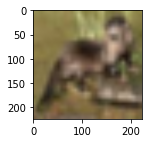

total image shape (192, 56, 56)


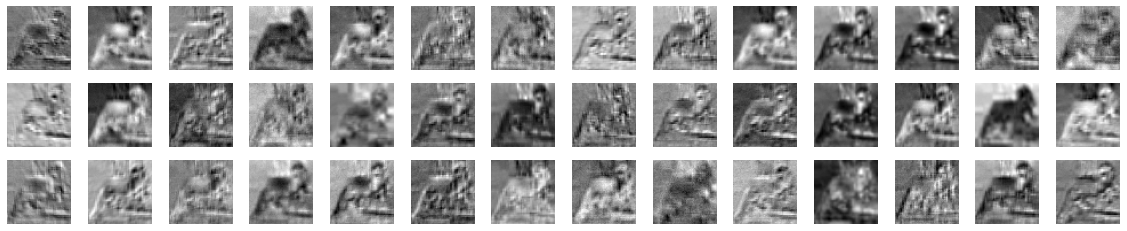

total image shape (384, 28, 28)


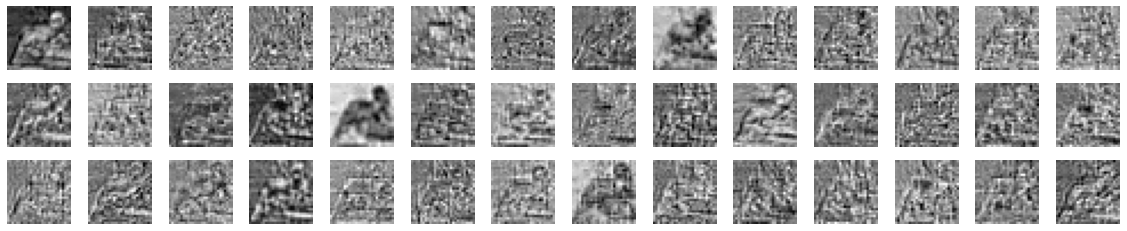

total image shape (768, 14, 14)


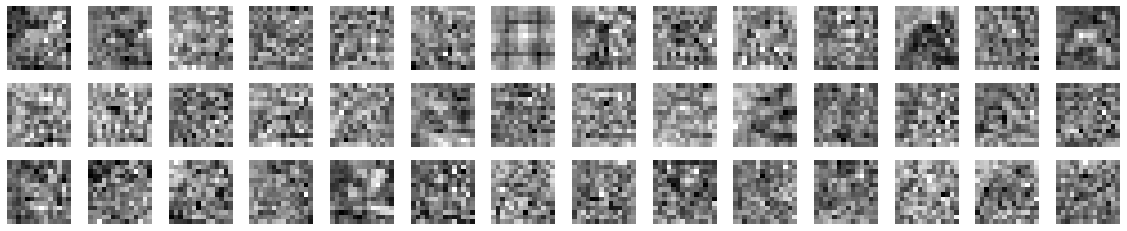

total image shape (1536, 7, 7)


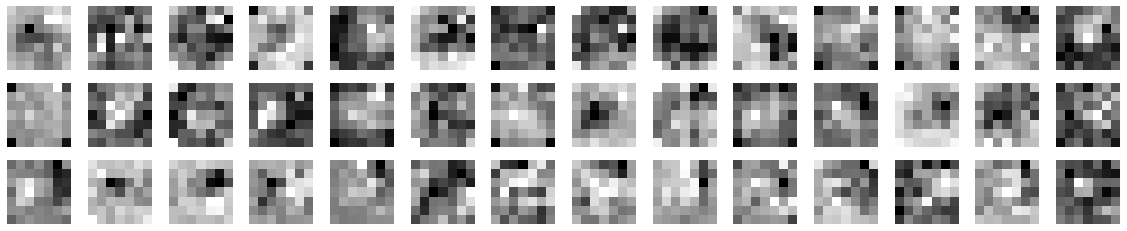

total image shape (1536, 7, 7)


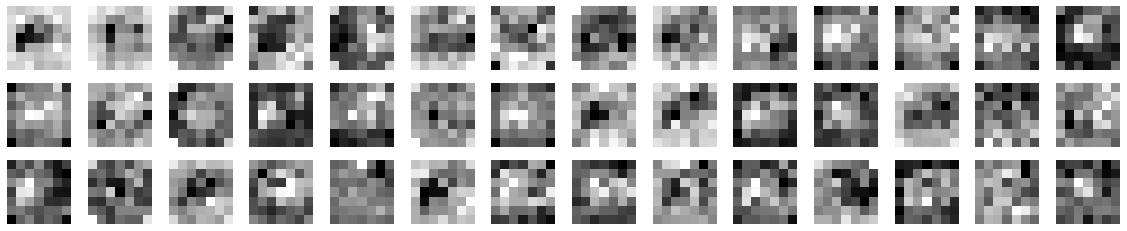

In [38]:
vs.visualization(100)

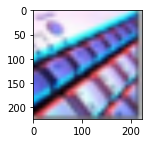

total image shape (192, 56, 56)


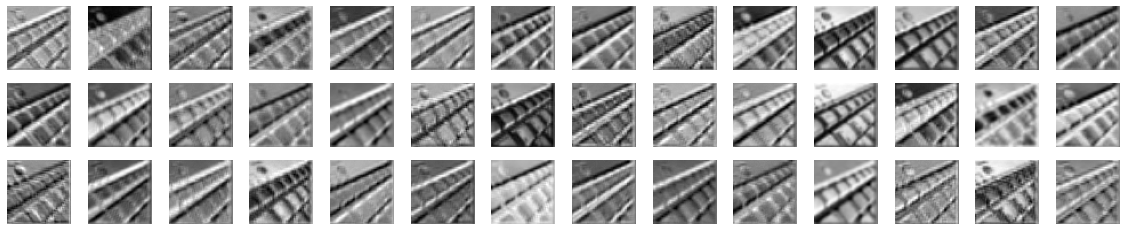

total image shape (384, 28, 28)


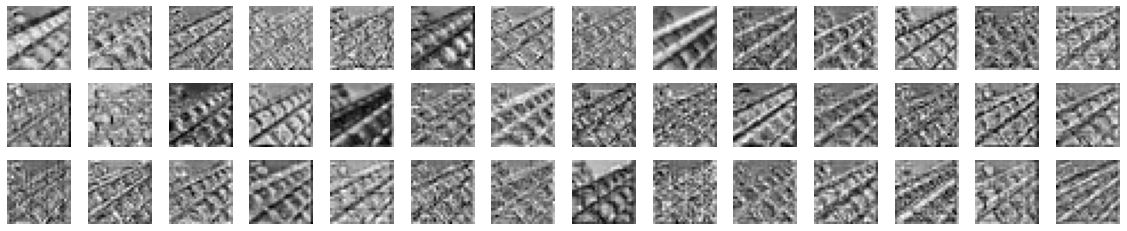

total image shape (768, 14, 14)


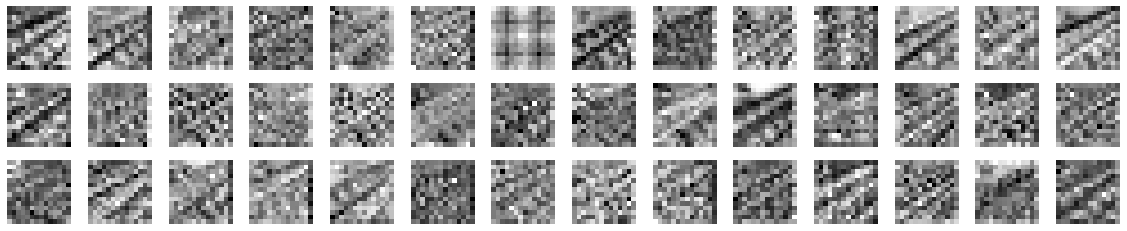

total image shape (1536, 7, 7)


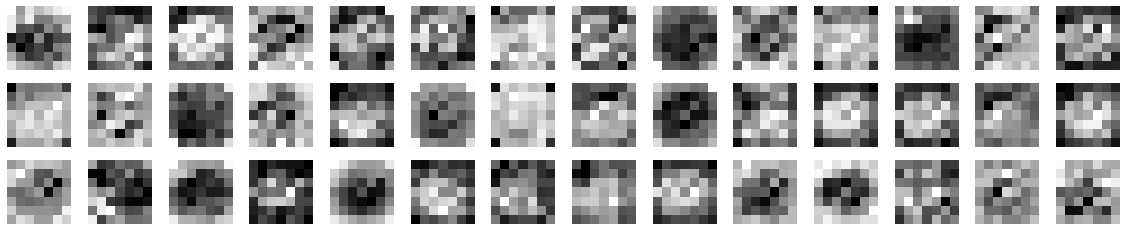

total image shape (1536, 7, 7)


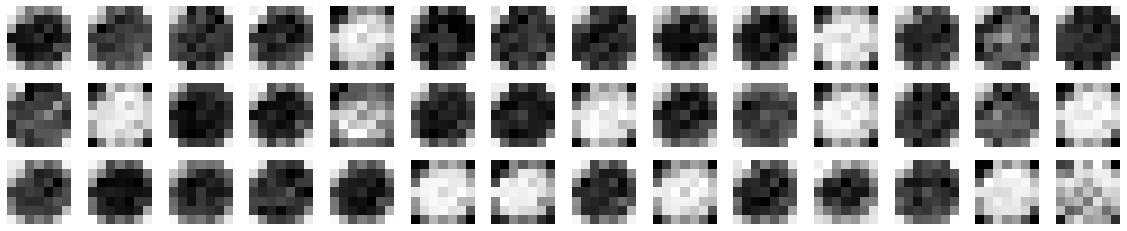

In [39]:
vs.visualization(200)

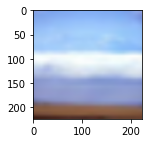

total image shape (192, 56, 56)


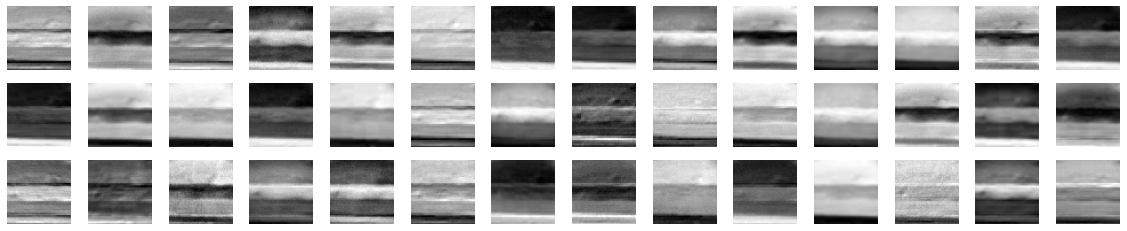

total image shape (384, 28, 28)


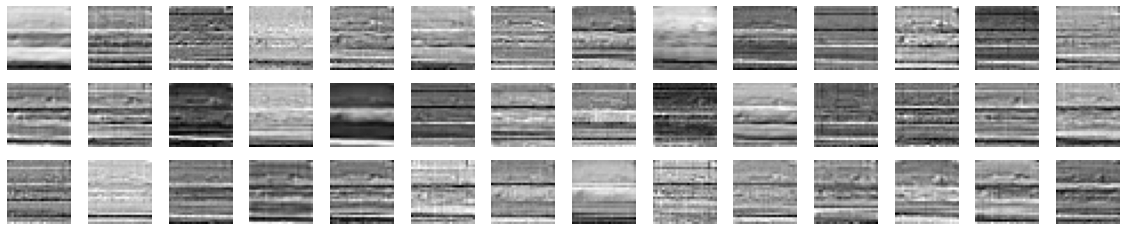

total image shape (768, 14, 14)


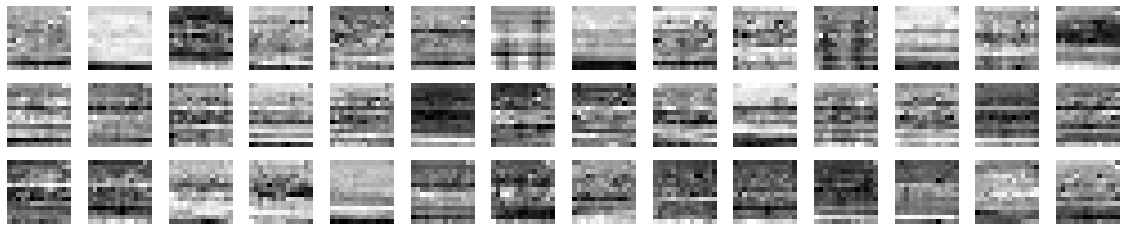

total image shape (1536, 7, 7)


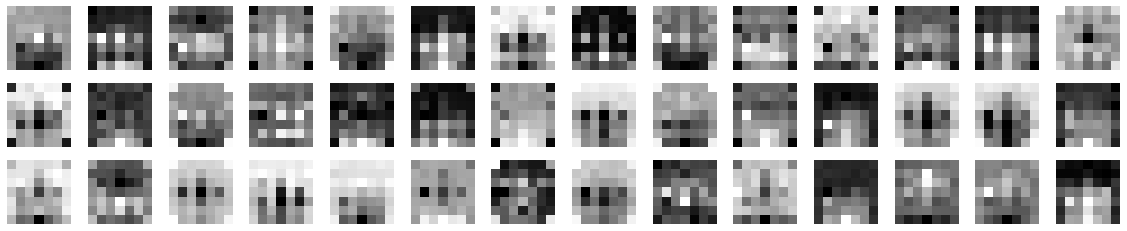

total image shape (1536, 7, 7)


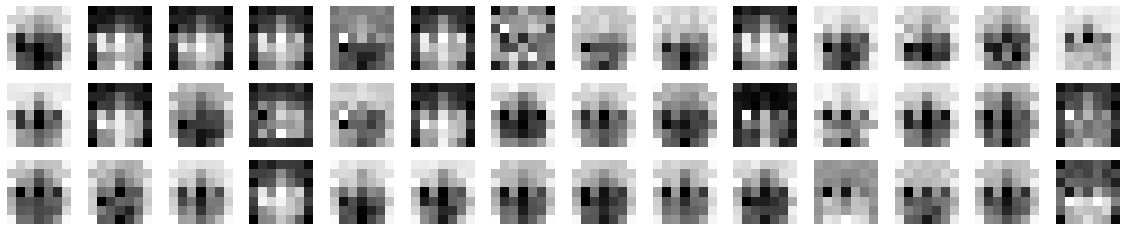

In [40]:
vs.visualization(300)